#STOCK PRICE PREDICTION USING LSTM

In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


###Loading data

In [1]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=5000)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('AAPL', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", 
             "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3441,2024-03-21,177.050003,177.490005,170.839996,171.369995,171.369995,106181300
3442,2024-03-22,171.759995,173.050003,170.059998,172.279999,172.279999,71106600
3443,2024-03-25,170.570007,171.940002,169.449997,170.850006,170.850006,54288300
3444,2024-03-26,170.000000,171.419998,169.580002,169.710007,169.710007,57388400
3445,2024-03-27,170.410004,173.600006,170.110001,173.309998,173.309998,60191400


Apple Data collected using API

###EDA

In [2]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-07-20,8.675000,9.032143,8.571786,8.996071,7.616068,1074950800
1,2010-07-21,9.467500,9.469643,9.071429,9.080000,7.687124,1185671200
2,2010-07-22,9.202857,9.285714,9.118214,9.250714,7.831651,645318800
3,2010-07-23,9.181786,9.299286,9.152857,9.283571,7.859469,533388800
4,2010-07-26,9.285714,9.289286,9.203929,9.260000,7.839511,420551600


In [3]:
data.nunique()

Date         3446
Open         3282
High         3267
Low          3286
Close        3284
Adj Close    3397
Volume       3437
dtype: int64

In [4]:
data.shape

(3446, 7)

There are 3446 records with 7 columns.

In [5]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3.446000e+03
mean,64.040854,64.721953,63.389255,64.085789,62.009140,2.211911e+08
std,57.218354,57.845795,56.634029,57.272985,57.707934,1.969245e+08
min,8.501429,8.664643,8.412857,8.568929,7.254450,2.404830e+07
25%,21.355089,21.539910,21.099108,21.352054,18.319809,8.900225e+07
50%,36.278751,36.609999,36.017500,36.421251,34.139284,1.425090e+08
75%,118.227499,119.515001,116.189999,117.467501,115.148733,2.924313e+08
max,198.020004,199.619995,197.000000,198.110001,197.857529,1.880998e+09


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3446 entries, 0 to 3445
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3446 non-null   datetime64[ns]
 1   Open       3446 non-null   float64       
 2   High       3446 non-null   float64       
 3   Low        3446 non-null   float64       
 4   Close      3446 non-null   float64       
 5   Adj Close  3446 non-null   float64       
 6   Volume     3446 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 188.6 KB


In [7]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

###Pre processing data

In [8]:
data.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
3441,False,False,False,False,False,False,False
3442,False,False,False,False,False,False,False
3443,False,False,False,False,False,False,False
3444,False,False,False,False,False,False,False


In [9]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

There are no null values.

In [10]:
data.drop('Volume',axis=1,inplace=True)

c:\Users\DURGA\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [11]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close'], dtype='object')

In [12]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3441    False
3442    False
3443    False
3444    False
3445    False
Length: 3446, dtype: bool

There are no duplicate values

In [14]:
data.dropna()

,Date,Open,High,Low,Close,Adj Close
0,2010-07-20,8.675000,9.032143,8.571786,8.996071,7.616068
1,2010-07-21,9.467500,9.469643,9.071429,9.080000,7.687124
2,2010-07-22,9.202857,9.285714,9.118214,9.250714,7.831651
3,2010-07-23,9.181786,9.299286,9.152857,9.283571,7.859469
4,2010-07-26,9.285714,9.289286,9.203929,9.260000,7.839511
...,...,...,...,...,...,...
3441,2024-03-21,177.050003,177.490005,170.839996,171.369995,171.369995
3442,2024-03-22,171.759995,173.050003,170.059998,172.279999,172.279999
3443,2024-03-25,170.570007,171.940002,169.449997,170.850006,170.850006
3444,2024-03-26,170.000000,171.419998,169.580002,169.710007,169.710007


There are no NaN values

###Visualization

In [15]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [16]:
import plotly.graph_objects as go
figure = go.Figure(data=[go.Candlestick(x=data["Date"],
                                        open=data["Open"], 
                                        high=data["High"],
                                        low=data["Low"], 
                                        close=data["Close"])])
figure.update_layout(title = "Apple Stock Price Analysis", 
                     xaxis_rangeslider_visible=False)
figure.show()

In [17]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=data.index, y=data['Open'],
                         mode='lines', name='Apple', line=dict(color='blue')))

In [18]:
correlation = data.corr()
print(correlation["Close"].sort_values(ascending=False))

Close        1.000000
Adj Close    0.999957
Low          0.999894
High         0.999889
Open         0.999768
Name: Close, dtype: float64


In [20]:
a=data.select_dtypes(include='O')
b=data.select_dtypes(exclude='O')
b.corr()

,Open,High,Low,Close,Adj Close
Open,1.000000,0.999905,0.999889,0.999768,0.999725
High,0.999905,1.000000,0.999862,0.999889,0.999838
Low,0.999889,0.999862,1.000000,0.999894,0.999861
Close,0.999768,0.999889,0.999894,1.000000,0.999957
Adj Close,0.999725,0.999838,0.999861,0.999957,1.000000


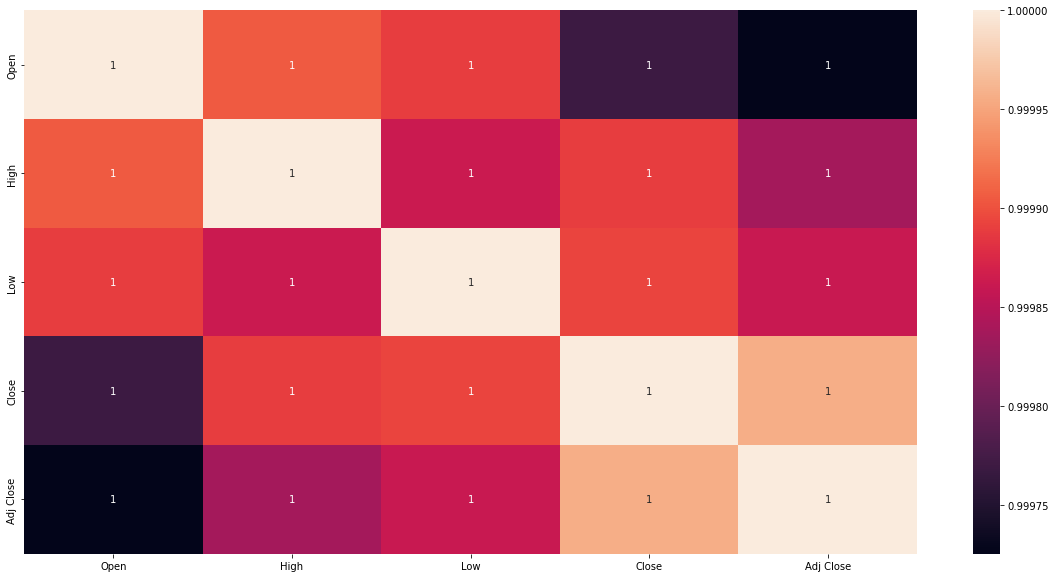

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.heatmap(b.corr(),annot=True)
plt.show()

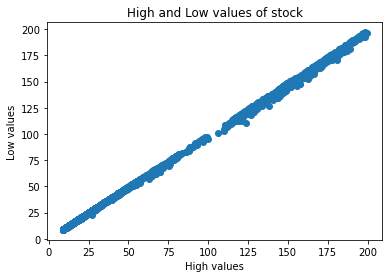

In [25]:
x1=data['High']
x2=data['Low']
plt.scatter(x1,x2)
plt.xlabel("High values")
plt.ylabel("Low values")
plt.title("High and Low values of stock")
plt.show()

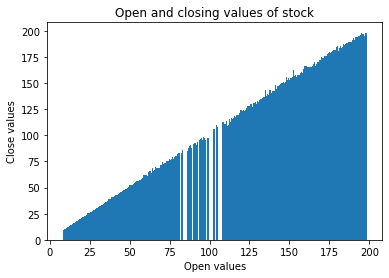

In [31]:
x3=data['Open']
x4=data['Close']
plt.bar(x3,x4)
plt.xlabel("Open values")
plt.ylabel("Close values")
plt.title("Open and closing values of stock")
plt.show()

###Model building

In [32]:
x = data[["Open", "High", "Low"]]
y = data["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

Data is splitted as training data and test data.

In [33]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (xtrain.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 128)            66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


LSTM Model is fitted.

In [35]:
model.compile(optimizer='adam', loss='mean_squared_error')
history=model.fit(xtrain, ytrain, batch_size=1, epochs=100)

Epoch 1/100
2756/2756 [==============================] - 15s 4ms/step - loss: 19.4810
Epoch 2/100
2756/2756 [==============================] - 10s 4ms/step - loss: 14.3531
Epoch 3/100
2756/2756 [==============================] - 13s 5ms/step - loss: 12.7780
Epoch 4/100
2756/2756 [==============================] - 14s 5ms/step - loss: 10.2372
Epoch 5/100
2756/2756 [==============================] - 15s 6ms/step - loss: 9.8313
Epoch 6/100
2756/2756 [==============================] - 13s 5ms/step - loss: 9.2472
Epoch 7/100
2756/2756 [==============================] - 14s 5ms/step - loss: 7.6699
Epoch 8/100
2756/2756 [==============================] - 22s 8ms/step - loss: 9.4182
Epoch 9/100
2756/2756 [==============================] - 25s 9ms/step - loss: 9.5398
Epoch 10/100
2756/2756 [==============================] - 15s 5ms/step - loss: 5.3126
Epoch 11/100
2756/2756 [==============================] - 14s 5ms/step - loss: 7.4283
Epoch 12/100
2756/2756 [==============================] - 1

In [38]:
y_pred=model.predict(xtest)

22/22 [==============================] - 2s 6ms/step


In [39]:
print(y_pred)

[[ 21.243729 ]
 [ 10.436516 ]
 [ 16.905752 ]
 [ 29.803345 ]
 [ 28.011065 ]
 [ 45.308838 ]
 [ 11.874697 ]
 [ 14.310316 ]
 [ 15.773586 ]
 [ 17.573597 ]
 [ 60.64988  ]
 [120.57987  ]
 [ 38.010933 ]
 [ 48.58893  ]
 [ 49.294834 ]
 [ 15.333647 ]
 [151.22362  ]
 [ 17.633678 ]
 [194.24504  ]
 [ 36.742275 ]
 [ 23.850237 ]
 [ 28.406265 ]
 [ 77.08182  ]
 [ 23.307526 ]
 [175.78372  ]
 [  9.061837 ]
 [122.62013  ]
 [ 24.172915 ]
 [ 14.383848 ]
 [ 19.33005  ]
 [ 43.831493 ]
 [ 85.57197  ]
 [ 69.44876  ]
 [ 72.09433  ]
 [132.47174  ]
 [156.76042  ]
 [ 12.216061 ]
 [ 27.968744 ]
 [ 28.874725 ]
 [ 39.0556   ]
 [ 27.297527 ]
 [ 54.83791  ]
 [ 18.480886 ]
 [175.14403  ]
 [ 17.467354 ]
 [ 24.389349 ]
 [132.74696  ]
 [136.51317  ]
 [ 27.969286 ]
 [ 12.710149 ]
 [189.32266  ]
 [133.96983  ]
 [ 73.67649  ]
 [ 19.885452 ]
 [ 46.75436  ]
 [ 33.03762  ]
 [ 12.321195 ]
 [ 24.351423 ]
 [151.38274  ]
 [136.67252  ]
 [ 36.520306 ]
 [ 26.857752 ]
 [ 12.539544 ]
 [ 47.682495 ]
 [ 12.731099 ]
 [ 11.124133 ]
 [ 73.1430

In [45]:
l=model.evaluate(y_pred)
print(l)

22/22 [==============================] - 2s 2ms/step - loss: 0.0000e+00
0.0


In [46]:
l1=model.evaluate(xtest)
print(l1)

22/22 [==============================] - 1s 2ms/step - loss: 0.0000e+00
0.0


There is no loss

###Metrics for LSTM

In [42]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

mse=mean_squared_error(y_pred,ytest)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 2.1236085588342495


In [41]:
mae=mean_absolute_error(y_pred,ytest)
print("Mean absolute error is:",mae)

Mean absolute error is: 0.924754984482475


In [44]:
import math
rmse=math.sqrt(mse)
print("Root mean squared error is:",rmse)

Root mean squared error is: 1.457260635176237


In [18]:
l = model.evaluate(xtest, ytest)
print(l)


22/22 [==============================] - 1s 3ms/step - loss: 0.9344
0.934400737285614


###Linear regression

In [61]:
from sklearn.linear_model import LinearRegression  
regressor= LinearRegression()  
model2=regressor.fit(xtrain, ytrain)  

In [54]:
y_pred=regressor.predict(xtest)

In [55]:
y_pred

array([[ 20.61817057],
       [ 10.13315091],
       [ 16.70800729],
       [ 29.38454716],
       [ 27.61944438],
       [ 44.62037031],
       [ 11.65816539],
       [ 14.46517098],
       [ 15.62456079],
       [ 17.52929993],
       [ 60.64828931],
       [114.82479102],
       [ 38.62544347],
       [ 46.74549026],
       [ 48.31118784],
       [ 15.23686802],
       [148.72493068],
       [ 17.25303684],
       [195.88385037],
       [ 36.19755154],
       [ 23.55037182],
       [ 27.39440751],
       [ 78.05091599],
       [ 22.58484494],
       [174.87546629],
       [  8.92857198],
       [118.20104333],
       [ 23.71033009],
       [ 14.63051484],
       [ 19.36439714],
       [ 43.56358135],
       [ 85.77726375],
       [ 66.80633237],
       [ 74.00106637],
       [129.26691597],
       [154.53929797],
       [ 11.98010714],
       [ 27.34070461],
       [ 28.10816864],
       [ 38.32425372],
       [ 26.75969119],
       [ 53.28421915],
       [ 18.28593553],
       [175

###Metrics for Linear regression

In [56]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [57]:
mae2 = mean_absolute_error(ytest, y_pred)
print("Mean absolute error for regression is:",mae)


Mean absolute error for regression is: 0.2742061821673926


In [58]:
mse2=mean_squared_error(ytest,y_pred)
print("Mean squared error for regression is:",mse2)

Mean squared error for regression is: 0.23903217586363334


In [59]:
import math
rmse2=math.sqrt(mse2)
print("Root mean squared error for regression is:",rmse2)

Root mean squared error for regression is: 0.4889091693388797


###Prediction system

In [63]:
import numpy as np
open1=float(input("Enter open value of stock"))
high1=float(input("Enter high value of stock"))
low1=float(input("Enter low value of stock"))
print("The open,high and low values of stock are:",open1,high1,low1)
features = np.array([[open1,high1,low1]])
res=model.predict(features)
print("The value uisg LSTM is:",res)
res2=model2.predict(features)
print("The value using Linear regression is:",res2)

The open,high and low values of stock are: 177.089996 180.419998 177.070007
1/1 [==============================] - 0s 60ms/step
The value uisg LSTM is: [[177.89844]]
The value using Linear regression is: [[179.85966543]]
